In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1=r"C:\Users\surya\Downloads\Python files\Visadataset.csv"
visa_df=pd.read_csv(file1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# steps in Outlier_Analysis
- step-1 : Find Q1,Q2 and Q3
- step-2 : Calculate IQR=Q3 -Q1
- srep-3 :  calculate lower and upper boundary
    - lb = Q1-1.5* IQR
    - up = Q3+ 1.5 * IQR
- step-4 : Find the outliers_df
    - con1 ---> col data <lb
    - con2 ---> col data >up
    - con = col1 & con2
    - get data ====> visa_df[con]

# **Important**

In [14]:
# step_1
Q1= np.percentile(visa_df['prevailing_wage'],25)
Q2= np.percentile(visa_df['prevailing_wage'],50)
Q3= np.percentile(visa_df['prevailing_wage'],75)

# step-2
IQR = Q3 - Q1 

# step-3
lb= Q1 - (1.5 * IQR)
up= Q3 + (1.5 * IQR)

# step-4
# outliers
con1= visa_df['prevailing_wage']<lb
con2= visa_df['prevailing_wage']>up
con= con1 | con2   #-----------------> non_outlier data= c1 & c2
outlier_df=visa_df[con]
outlier_df

# non_outliers
con1= visa_df['prevailing_wage']>lb
con2= visa_df['prevailing_wage']<up
con= con1 & con2  
non_outlier_df=visa_df[con]
non_outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


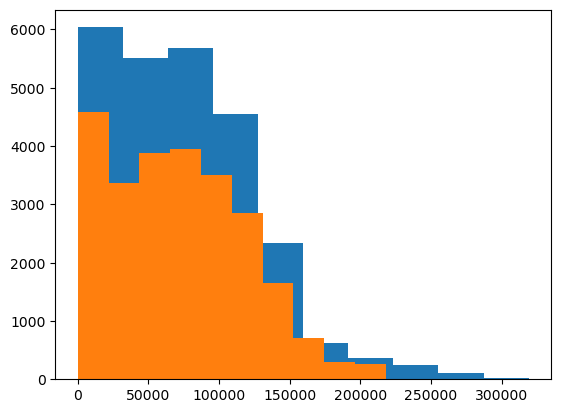

In [18]:
# compare original data with outliers data
# with plot histogram and box plot for both
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outlier_df['prevailing_wage'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e157516550>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1584a2150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e158633e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1584a3490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1584a2dd0>],
 'means': []}

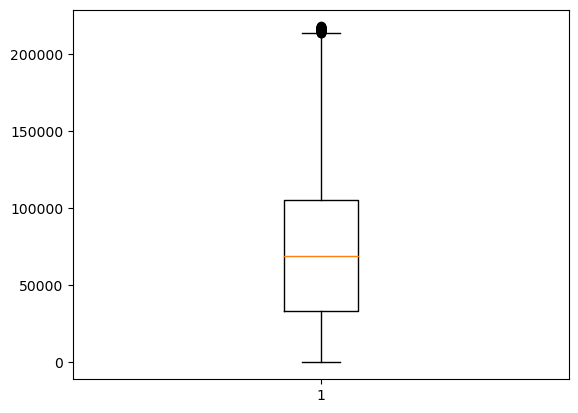

In [19]:
plt.boxplot(non_outlier_df['prevailing_wage'])

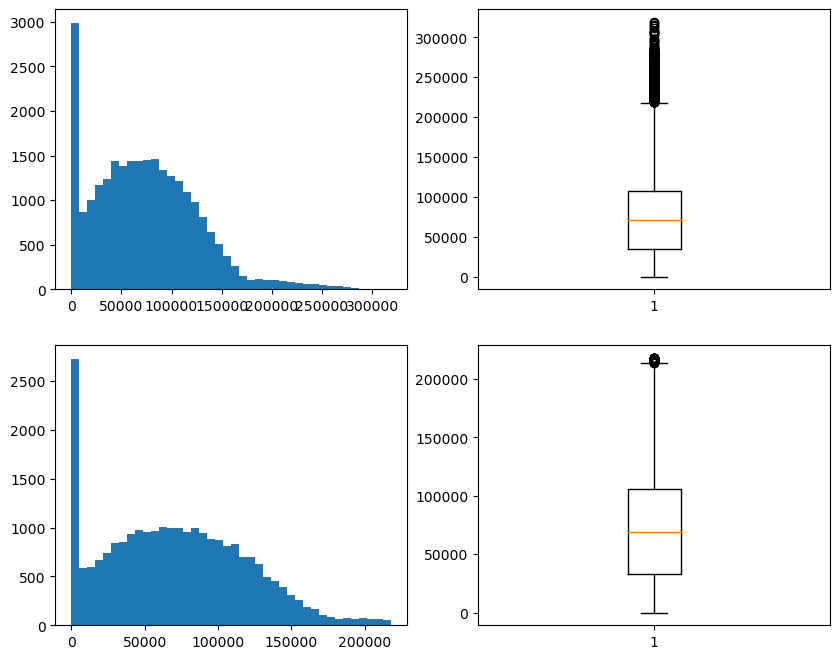

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outlier_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outlier_df['prevailing_wage'])
plt.show()

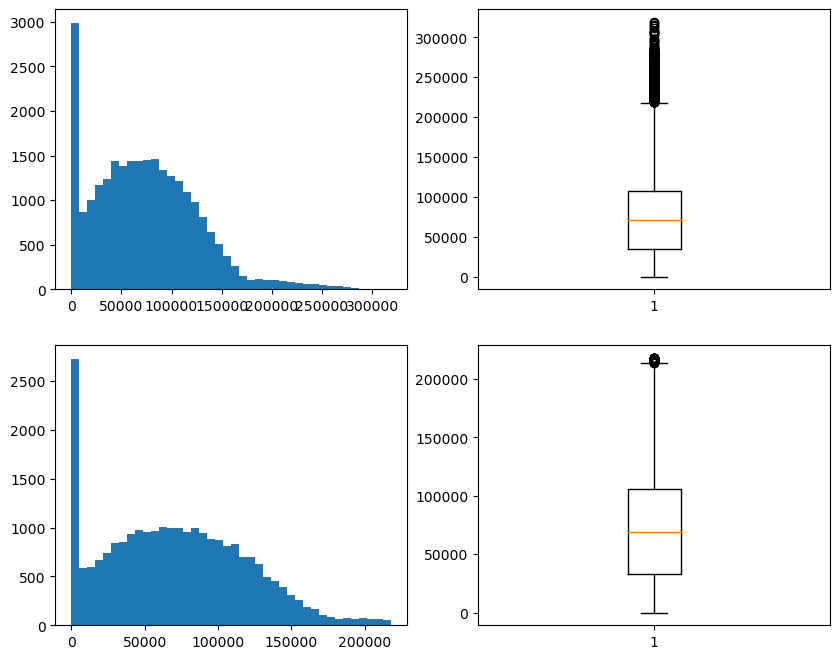

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outlier_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outlier_df['prevailing_wage'])
plt.show()

# ****Dealing the outliers****

- **1.drop outliers if outlier percentage is less than 2**
    - (non recommended due to data loss of other columns data)
- **2.Impute or fill with median values**
    - median is not effected by outliers
    - recommonded
- **3. cap with Q3 or Q1 value**
    - outliers less than lowerbound fill with Q1
    - outliers greater than upper bound fill with Q3 

In [ ]:
# **Task-3**
- read each observation from prevailing_wage 
- if that onservation <lb or > up fill with median value of prevailing value
otherwise leave it as it is

- take empty list=[]
- find median
- for i in visa_df['p_w']:
        if i<lb or i>up:
            empty_list.append(median)
        else:
            empty_list.append(i)
- print(empty_list)

# **task-3**

In [41]:
# Task-3
l=[]
prevail_wage=visa_df['prevailing_wage']
prevail_wage
median=np.median(visa_df['prevailing_wage'])
# step_1
Q1= np.percentile(visa_df['prevailing_wage'],25)
Q2= np.percentile(visa_df['prevailing_wage'],50)
Q3= np.percentile(visa_df['prevailing_wage'],75)

# step-2
IQR = Q3 - Q1 

# step-3
lb= Q1 - (1.5 * IQR)
up= Q3 + (1.5 * IQR)

for i in prevail_wage:
    if i<lb or i>up:
        l.append(median)
    else:
        l.append(i)
#print(l)
print(len(l))

25480
